# Topic Modeling
-  NLP(Natural Language Processing), Topic Modelling is used to identify and extract abstract topics from large collections of text documents. It uses algorithms such as Latent Dirichlet Allocation (LDA) to identify latent topics present in the text and represent documents as a mixture of these topics.
-  The data contains 1.2 million rows and 2 columns namely "publish date" and "headline text". "Headline text" column contains news headlines and "publish date" column contains the date the headline was published.
-  Process : Input Text -> Data Pre-Processing Step -> Topic Modeling -> Multiple Topics
-  perform topic modelling on a dataset of news headlines to show the topics that stand out and uncover patterns and trends in the news.
-  visual representation of the dominant topics, which can be used by news aggregators, journalists, and individuals to quickly gain a broad understanding of the current news landscape.

In [7]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url ='https://github.com/KevKibe/Topic-Modelling-using-LDA/raw/main/abcnews-date-text.csv'

In [5]:
data = pd.read_csv(url)

In [6]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [9]:
df = data.sample(n=10000, axis=0) #select few rows only
df.shape

(10000, 2)

In [8]:
#!pip install gensim

In [10]:
# other libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [12]:
df.drop(columns='publish_date', inplace=True, axis=0)
df.head()

,headline_text
1018042,fitlink advertisement
468026,four swine flu patients in intensive care
1107620,diesel generators back up power supply
320801,council shake up wont affect gatton budget
304222,mp urges help to ease drought hardship


In [13]:
#download nltk words
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\du\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\du\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\du\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [15]:
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

### pd.apply
-  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
-  Apply a function along an axis of the DataFrame.
-  DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)

In [20]:
df= df['headline_text'].apply(lambda x: x.lower())

In [21]:
df = df.apply(preprocess)

In [22]:
df.head()

1018042                          [fitlink, advertisement]
468026       [four, swine, flu, patient, intensive, care]
1107620          [diesel, generator, back, power, supply]
320801     [council, shake, wont, affect, gatton, budget]
304222          [mp, urge, help, ease, drought, hardship]
Name: headline_text, dtype: object

## Create a dictionary from the preprocessed data
-  from gensim.corpora import Dictionary

In [27]:
dict1 = Dictionary(df)
type(dict1)

gensim.corpora.dictionary.Dictionary

In [29]:
list(dict1.items())[:10]

[(0, 'advertisement'),
 (1, 'fitlink'),
 (2, 'care'),
 (3, 'flu'),
 (4, 'four'),
 (5, 'intensive'),
 (6, 'patient'),
 (7, 'swine'),
 (8, 'back'),
 (9, 'diesel')]

In [30]:
# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dict1.filter_extremes(no_below=5, no_above=0.5)

In [32]:
bow_corpus = [dict1.doc2bow(text) for text in df]

## Train the LDA model

In [33]:
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dict1, passes=20, alpha='auto', eta='auto')

In [43]:
# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
print(topics[0:10])

[(0, [('say', 0.025524955), ('interview', 0.014015135), ('change', 0.012546276), ('day', 0.012062579), ('election', 0.011290847), ('farmer', 0.010374182), ('school', 0.010072299), ('mp', 0.009783481), ('test', 0.008768323), ('green', 0.008361593)]), (1, [('u', 0.017659886), ('fire', 0.016677255), ('nsw', 0.015820969), ('plan', 0.015785208), ('call', 0.015383031), ('water', 0.014302156), ('report', 0.012036096), ('home', 0.011541173), ('health', 0.009407311), ('service', 0.008891555)]), (2, [('police', 0.02880368), ('new', 0.022963934), ('man', 0.019231131), ('australia', 0.01555441), ('woman', 0.011596043), ('death', 0.0106502725), ('govt', 0.0105463015), ('qld', 0.01014635), ('australian', 0.009579815), ('year', 0.009397274)]), (3, [('court', 0.021647032), ('council', 0.020493316), ('crash', 0.0134881055), ('face', 0.012757453), ('claim', 0.011789505), ('get', 0.011083683), ('charge', 0.01067711), ('murder', 0.01035631), ('trial', 0.010236759), ('sex', 0.008819671)]), (4, [('win', 0.0

In [35]:
# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['say', 'interview', 'change', 'day', 'election', 'farmer', 'school', 'mp', 'test', 'green']
Topic: 1
Words: ['u', 'fire', 'nsw', 'plan', 'call', 'water', 'report', 'home', 'health', 'service']
Topic: 2
Words: ['police', 'new', 'man', 'australia', 'woman', 'death', 'govt', 'qld', 'australian', 'year']
Topic: 3
Words: ['court', 'council', 'crash', 'face', 'claim', 'get', 'charge', 'murder', 'trial', 'sex']
Topic: 4
Words: ['win', 'sydney', 'road', 'talk', 'market', 'push', 'rise', 'price', 'take', 'boost']


In [ ]:
lda_model.

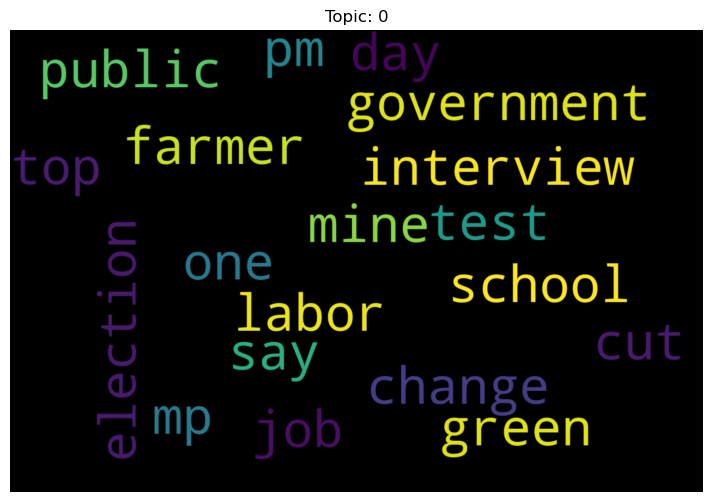

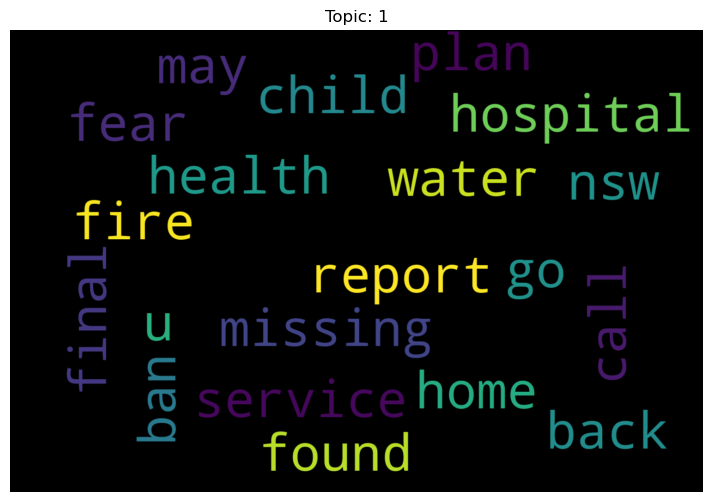

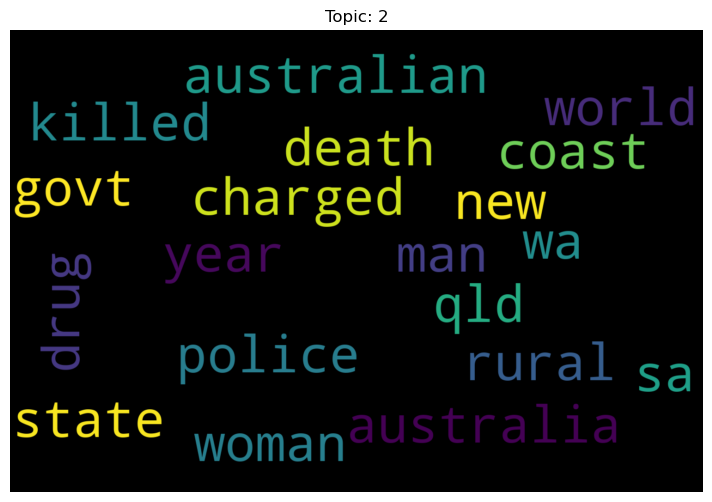

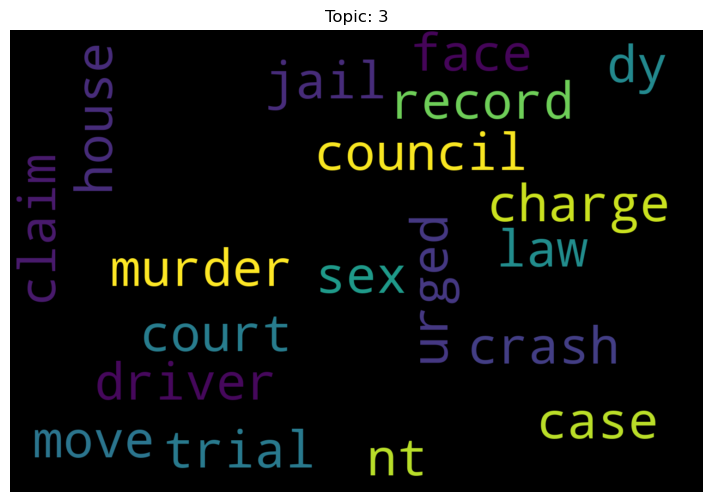

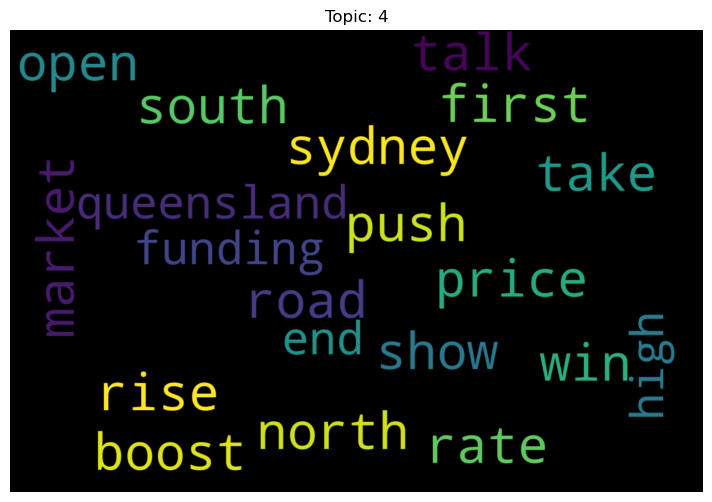

In [46]:
# Plot a wordcloud for each topic
for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=1500, height=1000, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show();